In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

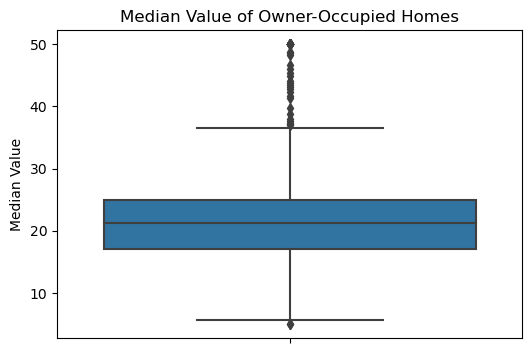

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value')
plt.show()

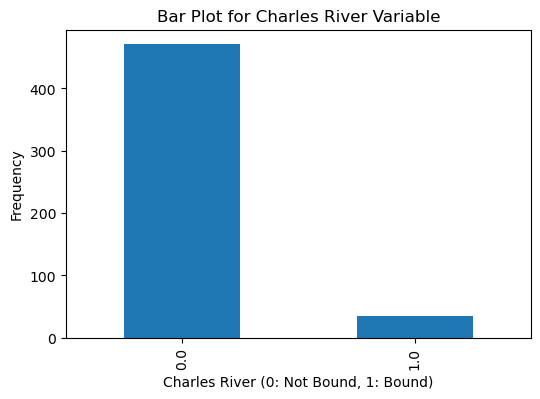

In [12]:
plt.figure(figsize=(6, 4))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Bar Plot for Charles River Variable')
plt.xlabel('Charles River (0: Not Bound, 1: Bound)')
plt.ylabel('Frequency')
plt.show()

In [13]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])


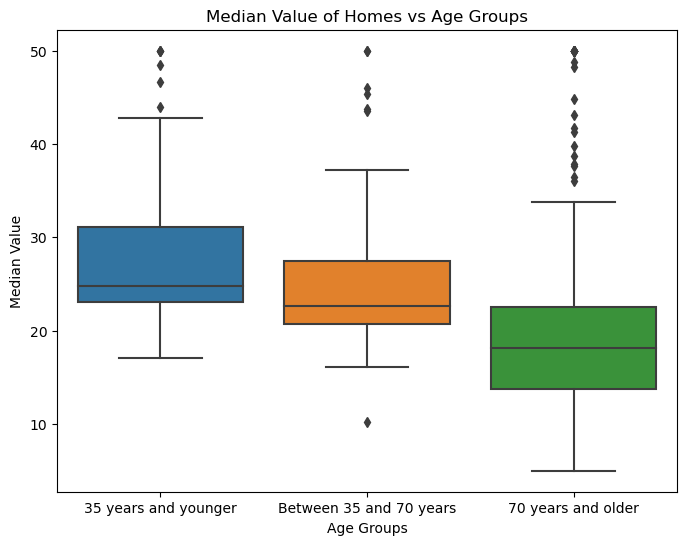

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Median Value of Homes vs Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Median Value')
plt.show()

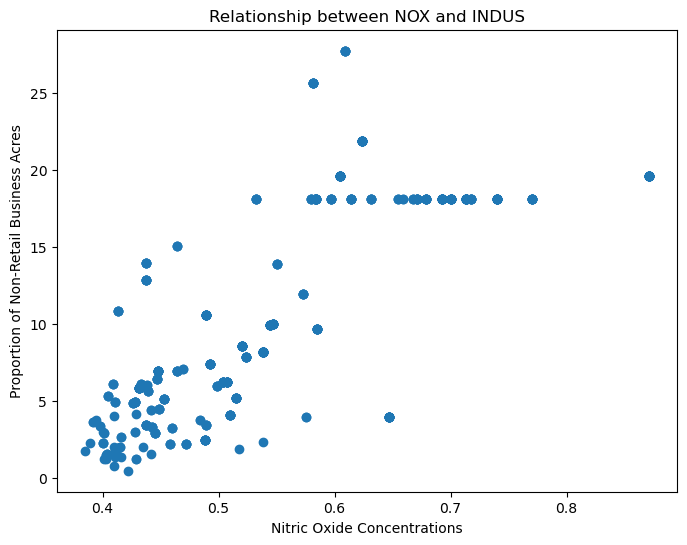

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.title('Relationship between NOX and INDUS')
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

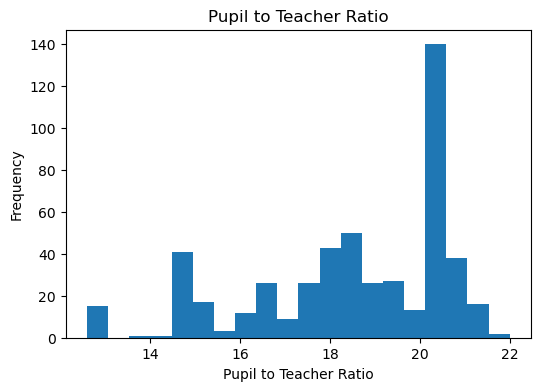

In [16]:
plt.figure(figsize=(6, 4))
plt.hist(boston_df['PTRATIO'], bins=20)
plt.title('Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [17]:
from scipy.stats import ttest_ind, f_oneway, pearsonr
import statsmodels.api as sm

# T-test for Question 1
houses_by_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
houses_not_by_river = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = ttest_ind(houses_by_river, houses_not_by_river)
print("T-test p-value:", p_value)
if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in median value based on being bounded by the Charles river.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference.")

# ANOVA for Question 2
age_groups = [boston_df[boston_df['AGE'] < 35]['MEDV'],
             boston_df[(boston_df['AGE'] >= 35) & (boston_df['AGE'] < 70)]['MEDV'],
             boston_df[boston_df['AGE'] >= 70]['MEDV']]
f_stat, p_value = f_oneway(*age_groups)
print("ANOVA p-value:", p_value)
if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in median values across age groups.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference.")

# Pearson Correlation for Question 3
correlation, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Pearson Correlation p-value:", p_value)
if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant relationship.")


T-test p-value: 7.390623170519905e-05
Reject Null Hypothesis: There is a significant difference in median value based on being bounded by the Charles river.
ANOVA p-value: 1.7105011022702984e-15
Reject Null Hypothesis: There is a significant difference in median values across age groups.
Pearson Correlation p-value: 7.913361061238693e-98
Reject Null Hypothesis: There is a significant relationship between NOX and INDUS.
